## Introducción a PyTorch (Parte 2)

<a target="_blank" href="https://colab.research.google.com/github/pglez82/DeepLearningWeb/blob/master/labs/notebooks/Introducci%C3%B3n%20a%20PyTorch.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

En esta segunda parte del tutorial vamos a empezar a usar los tensores como herramientas fundamentales para construir redes neuronales. Es decir, vamos a utilizar la capacidad de los tensores de calcular **gradientes**. La capacidad de construir grafos computacionales y calcular gradientes de manera automática es una de las características más importantes de frameworks como PyTorch. 



#### Tensores y gradientes
Por defecto, un tensor no tiene espacio por defecto para almacenar su gradiente:

In [30]:
import torch

t1 = torch.tensor([2.,3.])
print(t1)
print(t1.requires_grad)


tensor([2., 3.])
False


Si queremos ser capaces de hacer backpropagation y que el tensor pueda calcular su gradiente dentro de un grafo computacional, debemos indicarlo:

In [31]:
t1 = torch.tensor([2.,3.], requires_grad=True)
print(t1)
print(t1.requires_grad)

tensor([2., 3.], requires_grad=True)
True


Ten en cuenta que para que el tensor pueda usar **requires_grad**, su tipo debe de ser float o uno de sus subtipos.

Vamos a crear ahora un grafo computacional simple y a calcular los gradientes de manera sencilla. Por ejemplo, imaginemos las siguientes operaciones:

In [32]:
x = torch.arange(3, dtype=torch.float16, requires_grad=True)
z = x+1
z = z**2
z = z+2
y = z.mean()
print(y)


tensor(6.6680, dtype=torch.float16, grad_fn=<MeanBackward0>)


La función que estamos programando aquí es la siguiente $$y=\dfrac{\sum_{i=1}^n{(x_i+1)^2+2}}{n}$$

Podemos ahora calcular el gradiente de $y$ con respecto a $x_i$:

In [33]:
y.backward()
print(x.grad)

tensor([0.6665, 1.3330, 2.0000], dtype=torch.float16)


Es decir, lo que estamos visualizando aquí es el cálculo del gradiente, es decir, $\dfrac{\partial{y}}{\partial{x_i}}$ para cada una de las entradas $x_i$. Te dejo como ejercicio que hagas estos cáculos tu con papel y lápiz utilizando la **regla de la cadena** y te salga el mismo resultado.

#### Visualización del grafo computacional
Vamos ahora a visualizar el grafo computacional para el ejemplo anterior. Para ello debemos utilizar un paquete extra (torchviz, que no viene en PyTorch por defecto). 

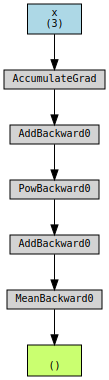

In [37]:
from torchviz import make_dot

dot = make_dot(y, params={"x": x})

dot